In [1]:
import _path_init
import numpy as np
from ndsolver.versions.parametric import MM
import matplotlib.pyplot as plt

In [6]:
import numpy.linalg as LA
from ndsolver.utils.cubic_solver import parametric_root_finder_1d

d, n = 2, 10
h = 1e-3
X = np.random.rand(d, n)

mm = MM(X, labels=[], m=1)
print("Initial cost: ", mm.get_cost())
print()
print(mm.grad())
print()
print(mm.grad_slow())
print()
print(mm.grad_approx())

Initial cost:  685.2655087751511



TypeError: parametric_root_finder_1d() missing 1 required positional argument: 'w'

In [ ]:
X = np.random.rand(2, 10)

mm = MM(X, labels=[], m=1)
print(mm.get_cost())
for _ in range(10):
    mm.update_state(grad_type=1)
    print(mm.get_cost())

print()
mm = MM(X, labels=[], m=1)
print(mm.get_cost())
for _ in range(10):
    mm.update_state(grad_type=2)
    print(mm.get_cost())

mm = MM(X, labels=[], m=1)
print()
print(mm.get_cost())
for _ in range(10):
    mm.update_state(grad_type=3)
    print(mm.get_cost())

1.789713109097472
1.7170721535109874
1.7143151437963766
1.7111767915224827
1.7075806181953725
1.7034258451210325
1.6985753102885375
1.6928343365297074
1.6859105001166317
1.6773274471646382
1.6662044306289705

1.789319135160595
1.5519810009134223
1.6471798128433306
1.7949944628895877
1.9527669339359839
2.1357656048933715
2.343503721665129
2.575980782555338
2.8338009075237083
3.1181768838106354
3.4308903800305073

2.1447744028725055
2.1447744028725055
2.1447744028725055
2.1447744028725055
2.1447744028725055
2.1447744028725055
2.1447744028725055
2.1447744028725055
2.1447744028725055
2.1447744028725055
2.1447744028725055


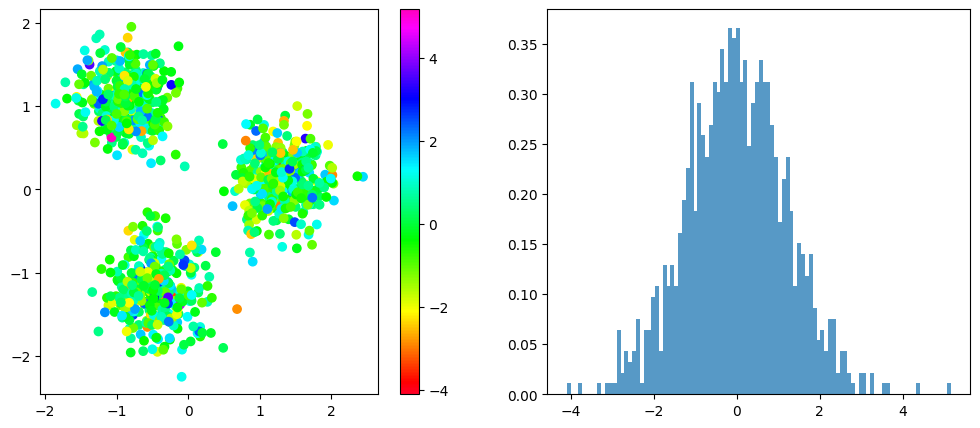

1.9558123681109358


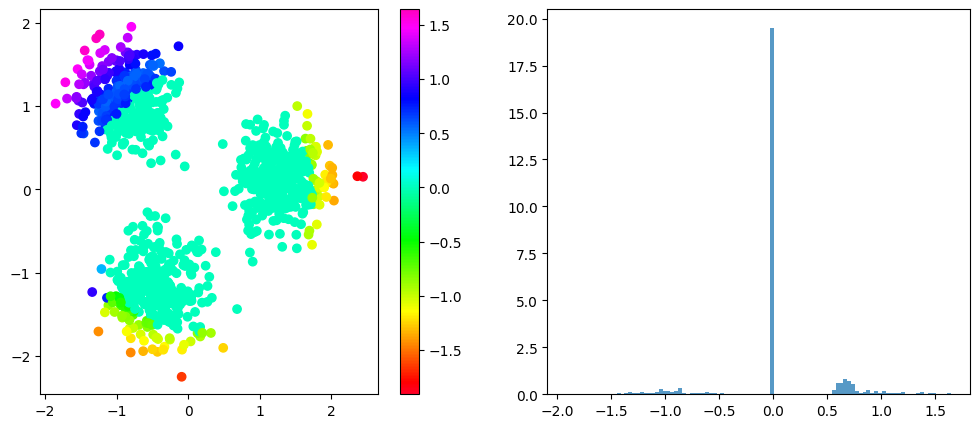

1.7816243209071159


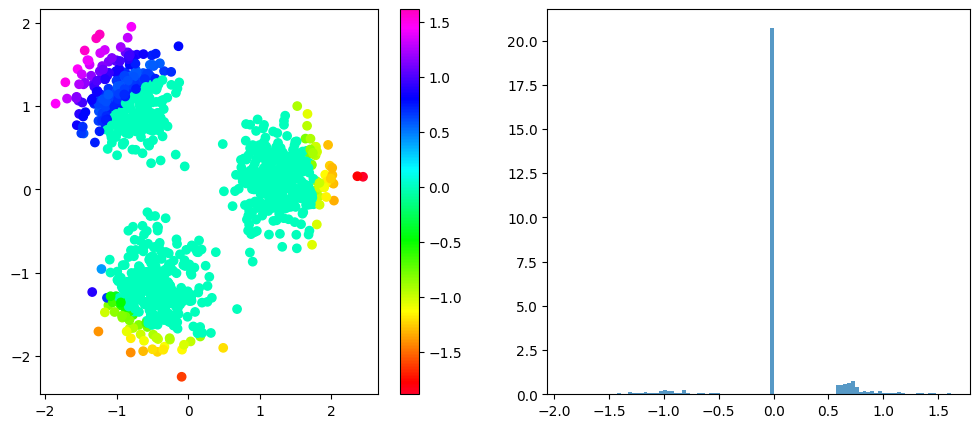

1.7959280201168262


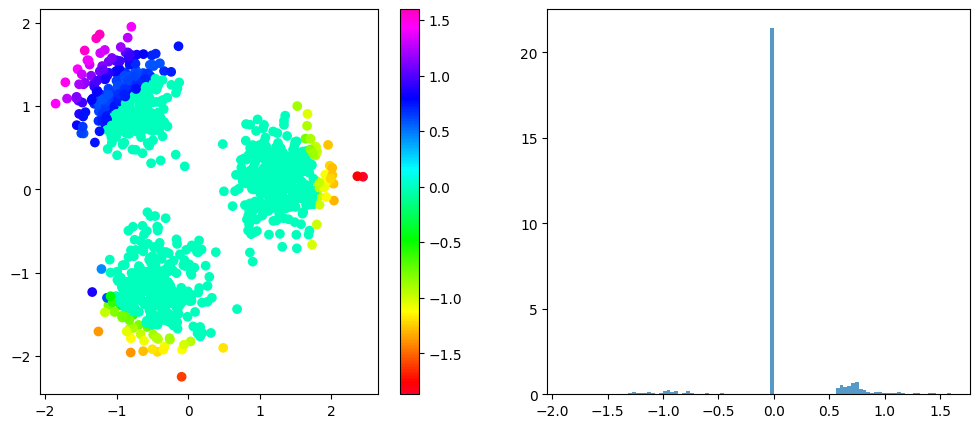

1.8027083348055435


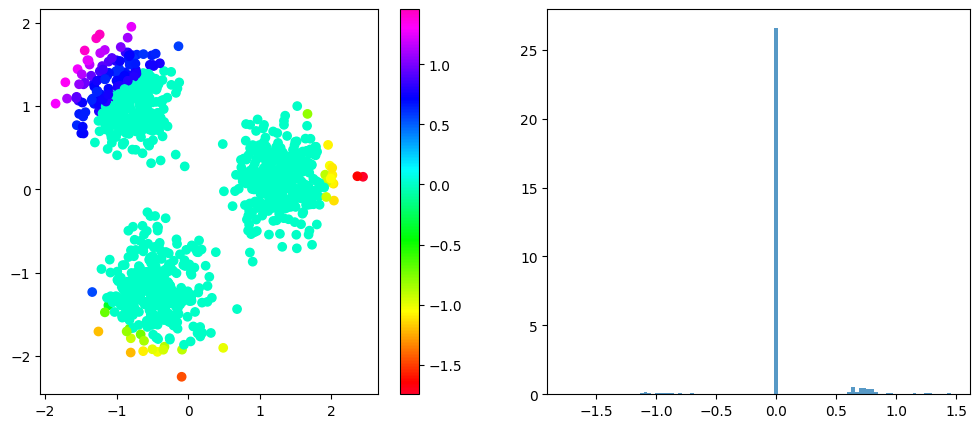

1.8438936658280567


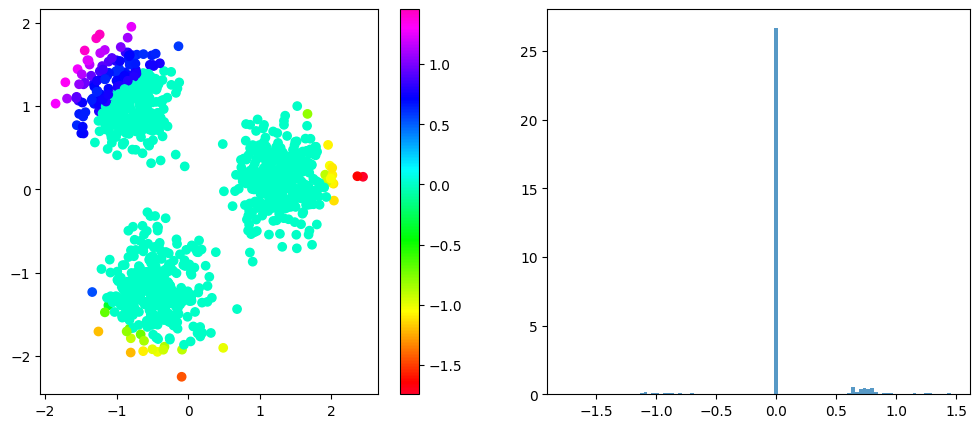

1.8447364428588322


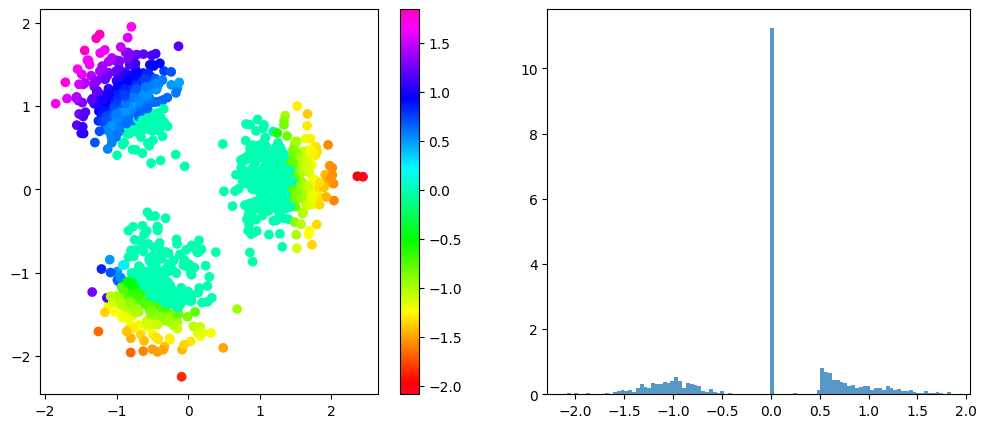

1.641490001301156


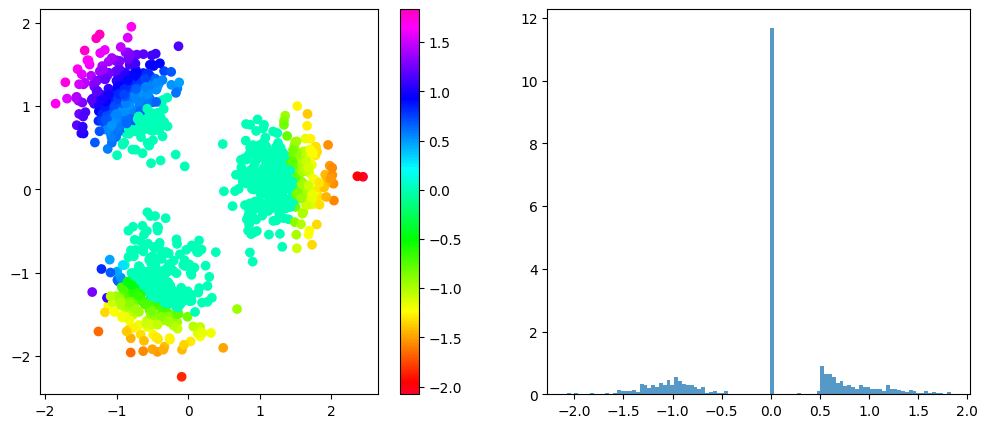

1.6512867261795465


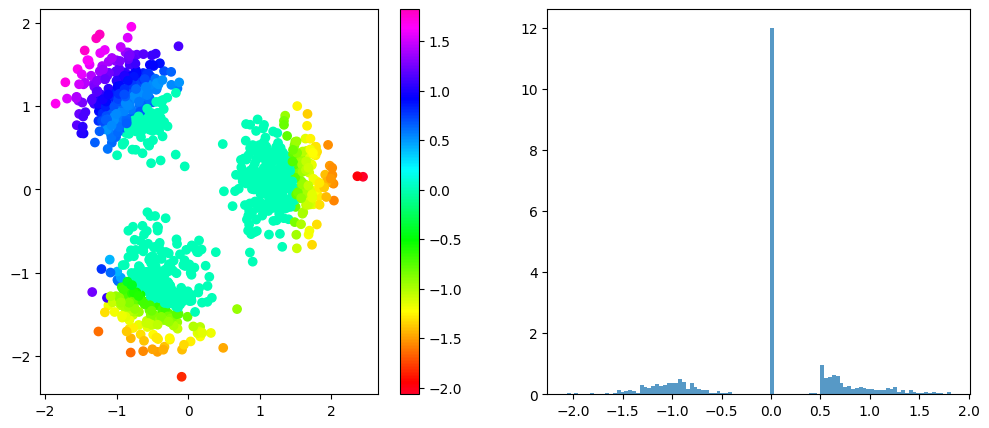

1.6608920820723976


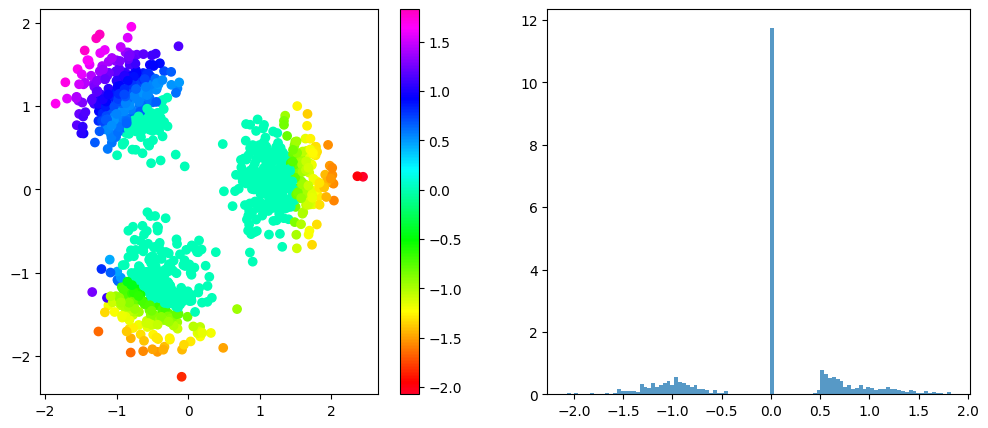

1.653647080240723


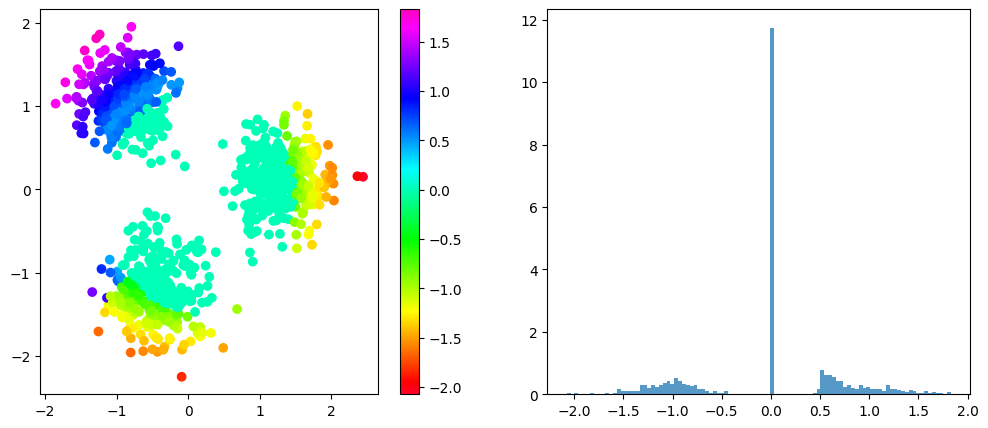

1.6528289127520497


In [ ]:
from sklearn.datasets import make_blobs
# Gaussians 2D to 1D example
# Generate three Gaussian clusters in 2D
X, y = make_blobs(n_samples=1000, centers=3, n_features=2)

# Fit the MM model to the data
mm = MM(X.T, labels=y, m=1)
mm.visualize()
print(mm.get_cost())

for _ in range(10):
    mm.update_state(iterations=10, grad_type=1)
    mm.visualize()
    print(mm.get_cost())

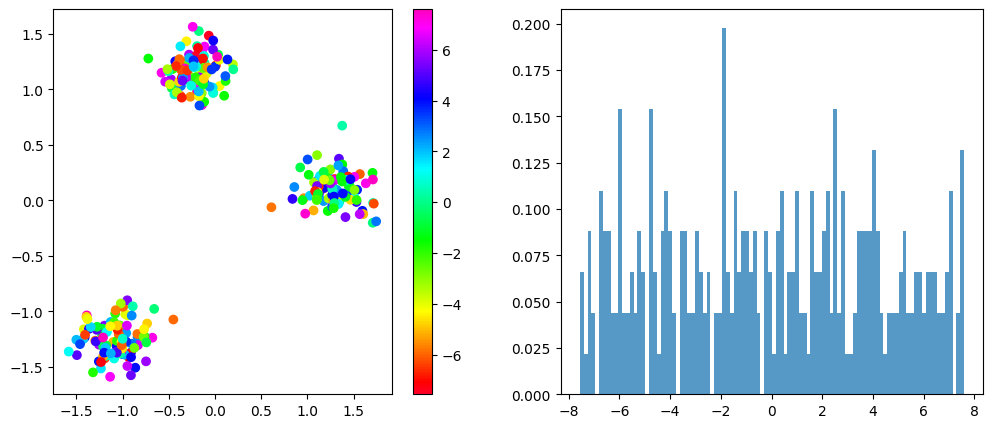

34440792.00711564


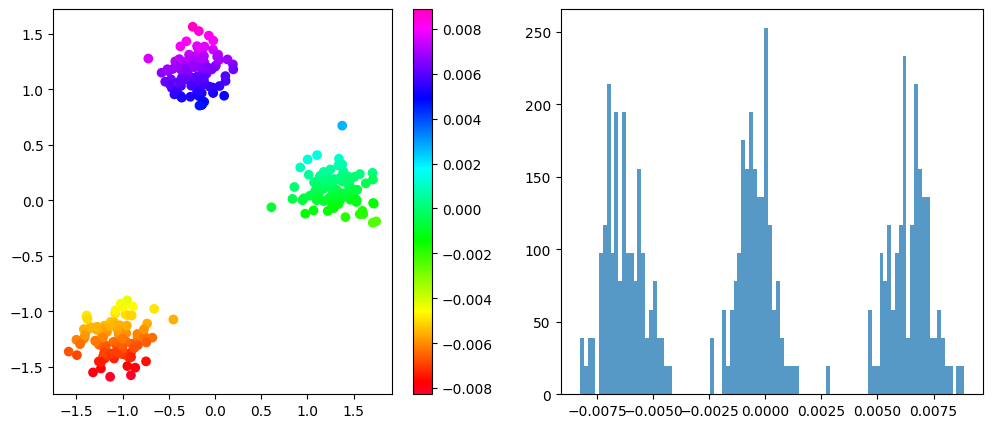

299078.41540716466


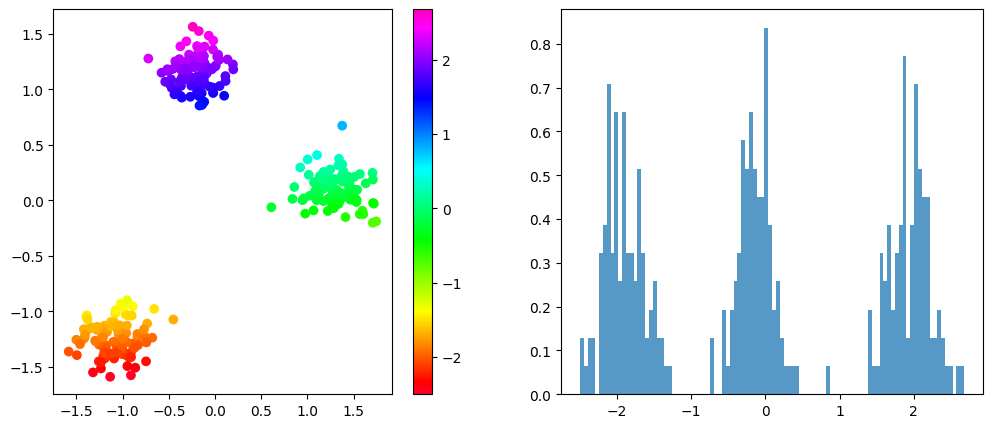

239958.9927149339


In [12]:
# UPDATED with w parameter
from scipy.spatial.distance import pdist

from sklearn.datasets import make_blobs
# Gaussians 2D to 1D example
# Generate three Gaussian clusters in 2D
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)
Y = np.random.uniform(-0.5, 0.5, (1, 300)) * (np.max(pdist(X)) * 1.42) / 2
# X, y = np.random.multivariate_normal([0,0], np.eye(2), 100).T, np.ones(100)

# Fit the MM model to the data
mm = MM(X.T, labels=y, m=1, init=Y)
mm.visualize()
print(mm.get_cost())

mm.update_state(step_size=1e-2, iterations=5, grad_type=2)
mm.visualize()
print(mm.get_cost())
    
mm.Y *= np.max(pdist(X)) * np.sqrt(2) / np.max(pdist(mm.Y.T))
mm.visualize()
print(mm.get_cost())

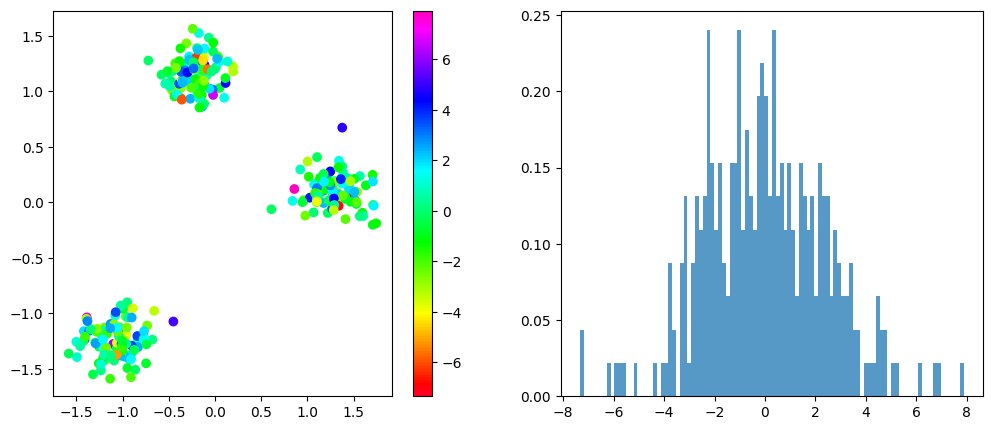

4154348.745284919


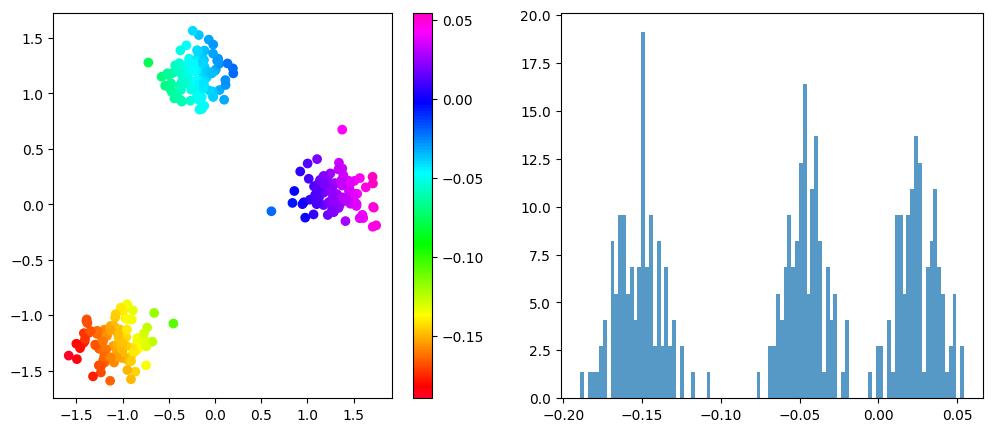

297316.65432116715


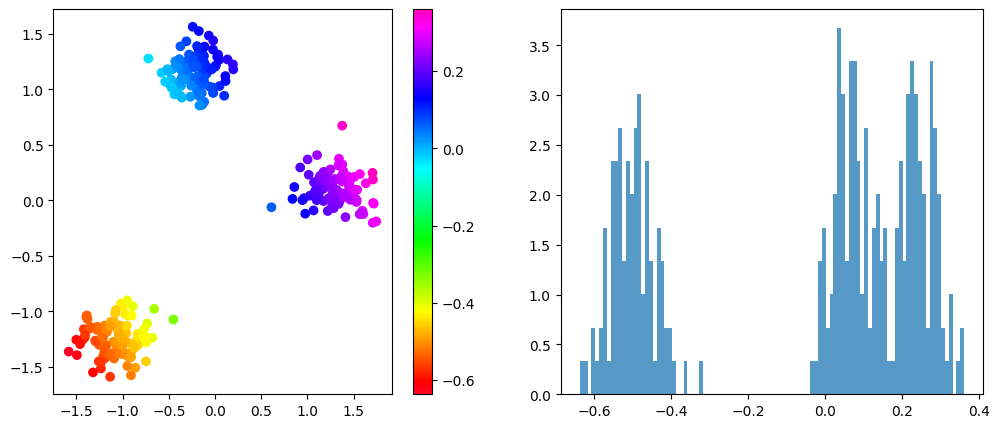

266227.6226803191


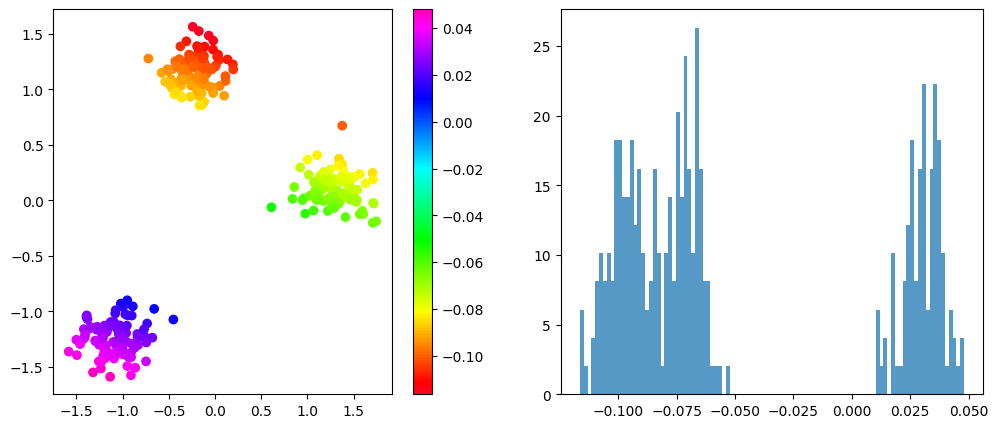

298094.4542323508


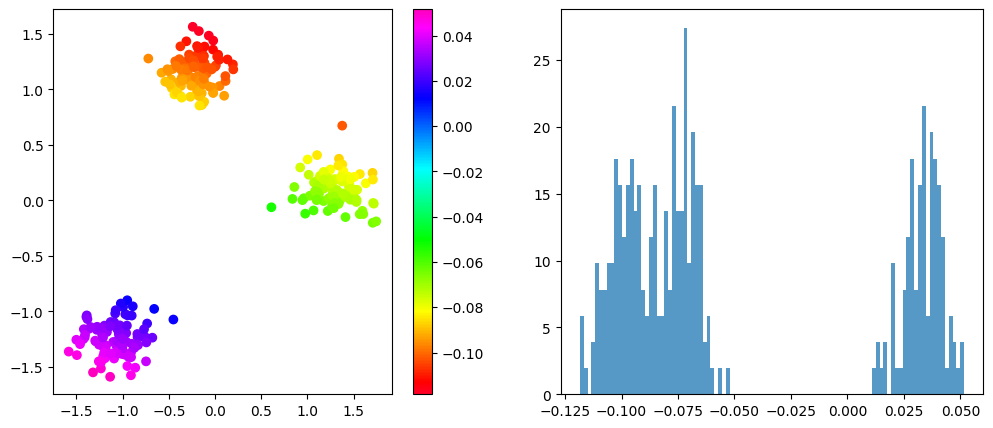

298019.19751206273


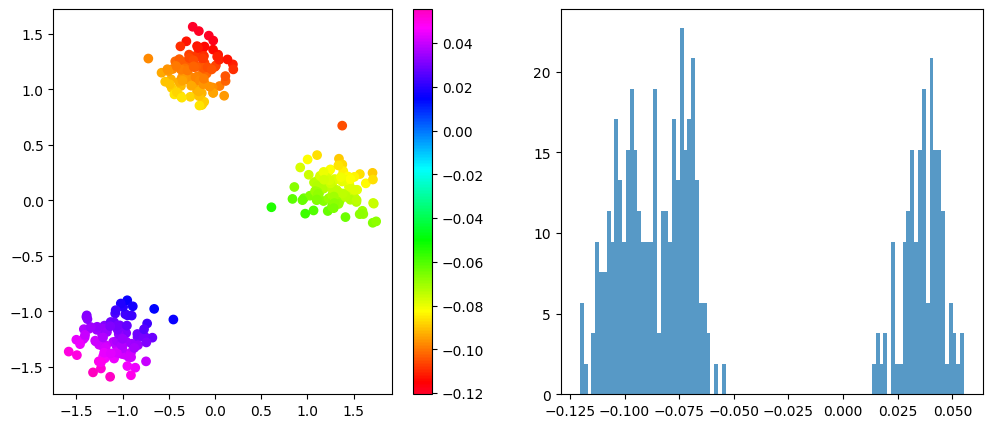

297937.9309104071


In [13]:
# UPDATED with w parameter (DONT re-run)

from sklearn.datasets import make_blobs
# Gaussians 2D to 1D example
# Generate three Gaussian clusters in 2D
# X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)
# X, y = np.random.multivariate_normal([0,0], np.eye(2), 100).T, np.ones(100)

# Fit the MM model to the data
mm = MM(X.T, labels=y, m=1, init=None)
mm.visualize()
print(mm.get_cost())

for _ in range(5):
    mm.update_state(step_size=1e-2, iterations=5, grad_type=3)
    mm.visualize()
    print(mm.get_cost())

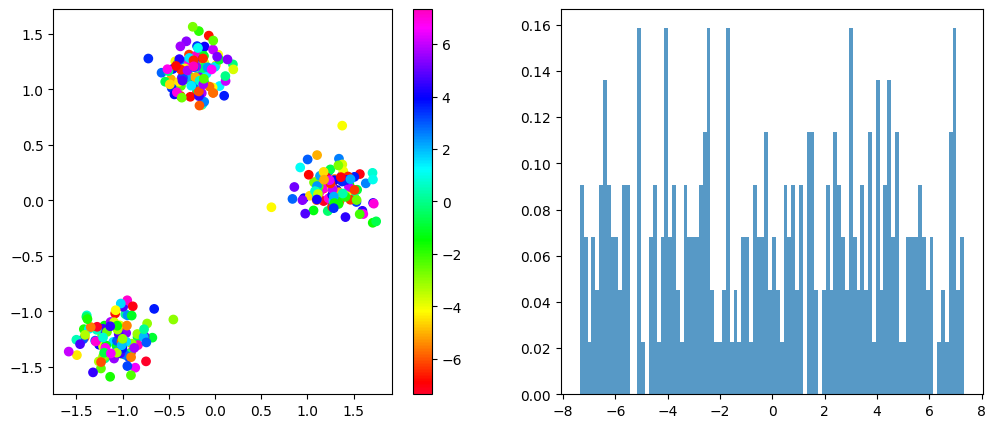

31926629.120488223


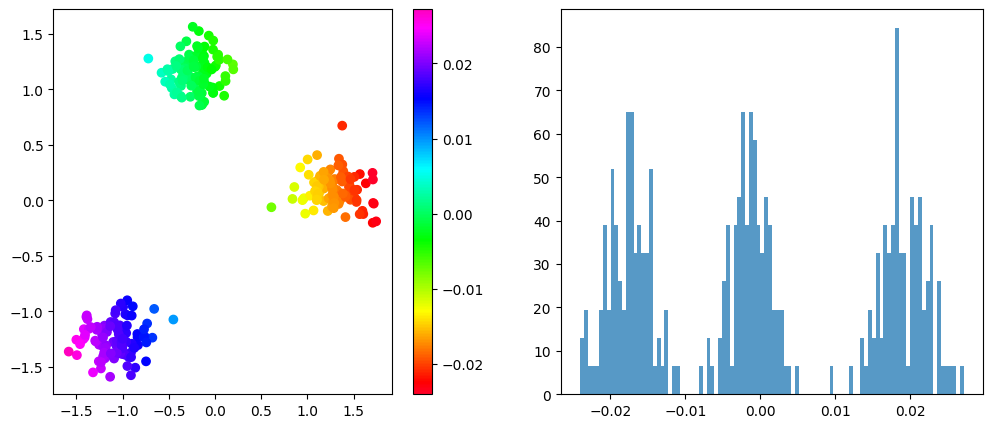

299011.51376563974
[-1, -0.875, -0.01, -0.005, -0.001, 0.001, 0.002, 0.004, 0.01, 0.05, 0.1, 0.25, 0.5, 0.625, 0.7, 0.75, 0.875, 1.0, 1.25, 1.5, 1.75, 2] [103328.84666684133, 56363.676600184735, 299015.04750873655, 299068.5302417115, 299085.64594563085, 299085.64594563085, 299083.5064500413, 299074.9485608274, 299015.04750873655, 297306.6734706597, 292006.42231419956, 256534.5065699282, 153132.5553531048, 99455.73575236581, 73864.3515103073, 61641.32469862932, 56363.676600184735, 103328.84666684132, 447970.3661422232, 1313848.3408333936, 2967752.441273103, 5724979.55081825]


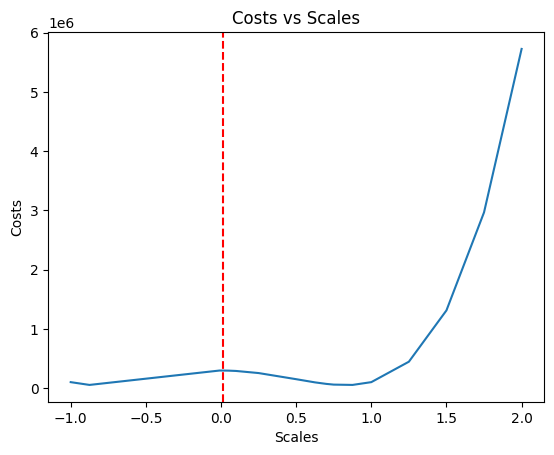

In [19]:
from scipy.spatial.distance import pdist
from sklearn.datasets import make_blobs

# Gaussians 2D to 1D example
# Generate three Gaussian clusters in 2D
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)
Y = np.random.uniform(-0.5, 0.5, (1, 300)) * (np.average(pdist(X)) * 1.5)
# X, y = np.random.multivariate_normal([0,0], np.eye(2), 100).T, np.ones(100)

# Fit the MM model to the data
mm = MM(X.T, labels=y, m=1, init=Y)
mm.visualize()
print(mm.get_cost())

mm.update_state(step_size=1e-2, iterations=0, grad_type=2)
mm.visualize()
print(mm.get_cost())

initial = np.average(pdist(mm.Y.T)) / np.average(pdist(X))

scales = [-1, -0.875, -.01, -.005, -.001, 0.001, 0.002, 0.004, 0.01, 0.05, 0.10, 0.25, 0.5, 0.625, 0.7, 0.75, 0.875, 1.0, 1.25, 1.5, 1.75, 2]
costs = []
for scale in scales:
    mm.Y *= np.average(pdist(X)) / np.average(pdist(mm.Y.T)) * scale
    costs.append(mm.get_cost())

print(scales, costs)
plt.plot(scales, costs)
plt.axvline(x=initial, linestyle='--', color='red')

plt.xlabel('Scales')
plt.ylabel('Costs')
plt.title('Costs vs Scales')
plt.show()